In [1]:
from foundry.util.registry import Registry
import foundry.core.tree as tree
import foundry.core as F
import foundry.datasets.vision
import foundry.numpy as npx

registry = Registry()
foundry.datasets.vision.register_all(registry)
dataset = registry.create("mnist")

normalizer = dataset.normalizer("hypercube")
train_data = dataset.split("train")
train_data = F.vmap(normalizer.normalize)(train_data.as_pytree())

X = train_data.pixels[:4096]
labels = train_data.label[:4096]

In [4]:
import foundry.util.tsne
import foundry.random
import jax

tsne = foundry.util.tsne.randomized_tsne(
    X,
    rng_key=foundry.random.key(42),
    allow_subsampling=True,
    perplexity=40,
    n_iter=4000, learning_rate=800
)

Expected:
[0.11186581 0.10241479 0.06183068 ... 0.06497458 0.06424648 0.05520948]

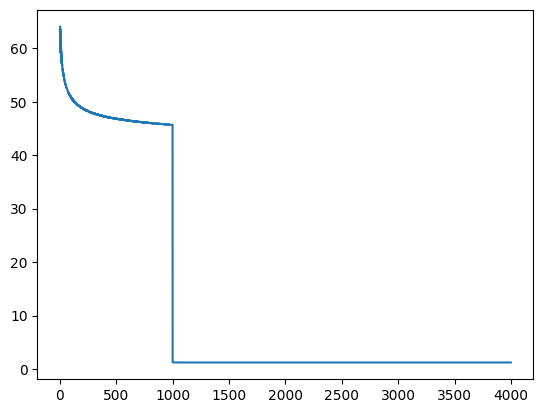

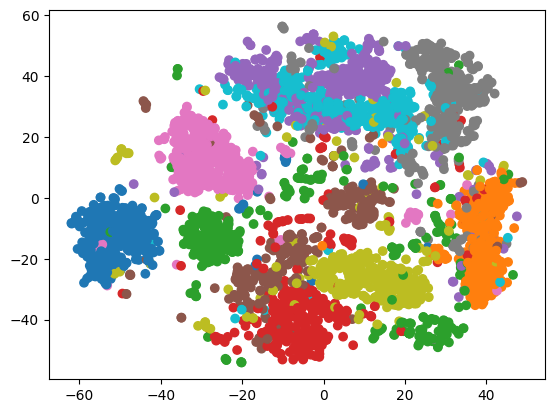

In [5]:
import matplotlib.pyplot as plt

plt.plot(npx.arange(tsne.loss_history.shape[0]), tsne.loss_history)
plt.show()
plt.scatter(tsne.embedding[:, 0], tsne.embedding[:, 1], c=labels, cmap="tab10")
plt.show()